In [24]:
import pandas as pd
 
messages = pd.read_csv("E:\\PROJECT EXCELR 2\\train_data_2000")

In [25]:
messages.head(10)

,Review_Text,Review_Rating,Sentiment Class
0,The GT-1000 6 shoes do not fit anywhere as wel...,2.0,Negative
1,Seems it is now hit or miss with these shoes a...,2.0,Negative
2,My pinky toes have blisters from just a 30-min...,2.0,Negative
3,I will not be buying these again .,2.0,Negative
4,I 'm sending these back .It looks like new bal...,2.0,Negative
5,I can not actually rate this product as I coul...,2.0,Neutral
6,Go Walk 3 was too large,2.0,Negative
7,It 's worse in the left shoe,2.0,Negative
8,I give these 2 stars because they do not breat...,2.0,Negative
9,does not render the expected running comfort .,2.0,Negative


In [26]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20818 entries, 0 to 20817
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Review_Text      20818 non-null  object 
 1   Review_Rating    20582 non-null  float64
 2   Sentiment Class  20818 non-null  object 
dtypes: float64(1), object(2)
memory usage: 488.0+ KB


In [27]:
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [28]:
## Get the Independent Features

X=messages.drop('Sentiment Class',axis=1)

In [29]:
## Get the Dependent features
y=messages['Sentiment Class']

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [33]:
messages=messages.dropna()


In [35]:
messages.reset_index(inplace=True)

In [37]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['Review_Text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=10000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [40]:
y=messages['Sentiment Class']

In [41]:
le = LabelEncoder() 
  
messages['Sentiment Class']= le.fit_transform(messages['Sentiment Class']) 

In [42]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [45]:
pip install scikit-learn

In [46]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
tfidf_v.get_feature_names()[:20]

['abil',
 'abl',
 'abl find',
 'abl get',
 'abl run',
 'abl wear',
 'absolut',
 'absolut amaz',
 'absolut amaz qualiti',
 'absolut comfort',
 'absolut fabul',
 'absolut fabul obstacl',
 'absolut love',
 'absolut love hike',
 'absolut love shoe',
 'absolut perfect',
 'absorb',
 'absorb impact',
 'absorb impact well',
 'absorb shock']

In [50]:
tfidf_v.get_params()


{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 10000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [49]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

In [52]:
count_df.head()

,abil,abl,abl find,abl get,abl run,abl wear,absolut,absolut amaz,absolut amaz qualiti,absolut comfort,absolut fabul,absolut fabul obstacl,absolut love,absolut love hike,absolut love shoe,absolut perfect,absorb,absorb impact,absorb impact well,absorb shock,absorpt,abus,accent,accept,access,accommod,accommod orthot,accomplish,accord,accordingli,account,accur,ach,achi,achi feet,achil,achil tendon,across,across shoe,across toe,...,year highli,year highli recommend,year love,year model,year never,year old,year old son,year realli,year run,year shoe,year still,year tri,year without,year work,yellow,yellow color,yesterday,yet,yet anoth,yet comfort,yet comfort soon,yet easi,yet easi get,yet insid,yet insid seam,yet light,yet speed,yet speed cross,yet support,yet travel,yet travel intern,yetbut,yo,young,youth,yr,zero,zig,zoom,zumba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
import matplotlib.pyplot as plt

In [54]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Sentiment Class')
    plt.xlabel('Predicted Sentiment Class')

In [55]:
# MultinomialNB Algorithm

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [56]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.815
Confusion matrix, without normalization


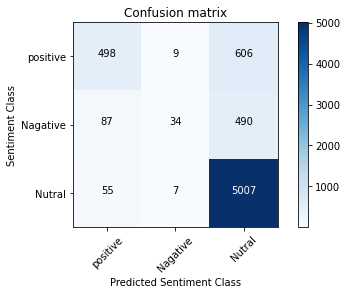

In [57]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['positive', 'Nagative','Neutral'])


In [58]:

# averagestring, [None, ‘binary’ (default), ‘micro’, ‘macro’, ‘samples’, ‘weighted’]
# This parameter is required for multiclass/multilabel targets. If None, the scores for each class are returned. Otherwise, this determines the type of averaging performed on the data:

# 'binary':
# Only report results for the class specified by pos_label. This is applicable only if targets (y_{true,pred}) are binary.

# 'micro':
# Calculate metrics globally by counting the total true positives, false negatives and false positives.

# 'macro':
# Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

# 'weighted':
# Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

# 'samples':
# Calculate metrics for each instance, and find their average (only meaningful for multilabel classification where this differs from accuracy_score).

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [60]:
print("Precision Score : ",precision_score(y_test, pred,pos_label='positive',average ='micro'))
print("Recall Score : ",recall_score(y_test, pred,pos_label='positive',average='micro'))

Precision Score :  0.815398204033564
Recall Score :  0.815398204033564


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [61]:
print("Precision Score : ", precision_score(y_test, pred,pos_label='Nagative',average ='macro'))
print("Recall Score : ",recall_score(y_test, pred,pos_label='Nagative',average ='macro'))

Precision Score :  0.7595137295865421
Recall Score :  0.49695154165554173


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'Nagative') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [62]:
print("Precision Score : ", precision_score(y_test, pred,pos_label='Nutral', average='weighted'))
print("Recall Score : ",recall_score(y_test, pred,pos_label='Nutral', average='weighted'))


Precision Score :  0.8008571744181578
Recall Score :  0.815398204033564


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'Nutral') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [63]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score


0.815398204033564

In [64]:
print(f1_score(y_test, pred, average='macro'))

0.5224637663204362


In [65]:
print(f1_score(y_test, pred, average='micro'))


0.8153982040335639


In [66]:
y_train.shape


(13789,)

In [67]:
# Passive Aggressive Classifier Algorithm

In [68]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [69]:
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)


accuracy:   0.780
Confusion matrix, without normalization


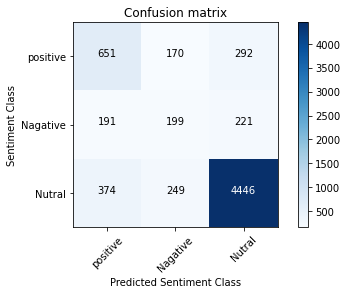

In [71]:

linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['positive', 'Nagative','Nutral'])

In [72]:
# Multinomial Classifier with Hyperparameter
classifier=MultinomialNB(alpha=0.1)

In [73]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))
    

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8055351096717209
Alpha: 0.1, Score : 0.817606359487708
Alpha: 0.2, Score : 0.8211394082143383
Alpha: 0.30000000000000004, Score : 0.8227587222140439
Alpha: 0.4, Score : 0.8249668776681879
Alpha: 0.5, Score : 0.8255557191226263
Alpha: 0.6000000000000001, Score : 0.8249668776681879
Alpha: 0.7000000000000001, Score : 0.8215810393051671
Alpha: 0.8, Score : 0.8177535698513175
Alpha: 0.9, Score : 0.8173119387604887


In [74]:
messages

,index,Review_Text,Review_Rating,Sentiment Class
0,0,The GT-1000 6 shoes do not fit anywhere as wel...,2.0,0
1,1,Seems it is now hit or miss with these shoes a...,2.0,0
2,2,My pinky toes have blisters from just a 30-min...,2.0,0
3,3,I will not be buying these again .,2.0,0
4,4,I 'm sending these back .It looks like new bal...,2.0,0
...,...,...,...,...
20577,20813,so I 'm not sure if I was unlucky or the soles...,1.0,0
20578,20814,If you can live with a split sole they are ext...,1.0,2
20579,20815,perfect height in the ankle,1.0,2
20580,20816,They pinched my feet so bad as to cause pain t...,1.0,0


In [ ]:
# renaming the column "A" 
messages.rename(columns = {"Sentiment Class": "Sentiment"},  
          inplace = True) 

In [75]:
review_list = messages["Review_Text"]
feature_list = ['price','delivery','comfort','brand','color','weight','size','fit']



In [76]:
feature_review_mapping = {}

for feature in feature_list:
    for reivew in review_list:
        if feature.lower().strip() in reivew.lower().strip():
            if feature in feature_review_mapping:
                current_mapped_review = feature_review_mapping[feature]
                current_mapped_review.append(reivew)
            else:
                feature_review_mapping[feature] = [reivew]

count=0
for feature in feature_review_mapping:
    print(feature)
    count=count+1
    print (count,feature_review_mapping[feature])
    print(len(feature_review_mapping[feature]))
    print ("#"*10)
 

price
1 ['My price was very cheap ( $ 26.83 ) so normally that does not buy much of a shoe', 'Too smal not really a jogging shoe after trying them on a mile jog my feet where in pain something not experience with my old shoes .. not worth the price would not recommend', 'Solid shoe however at a great price .', 'Ok price .', "Considering the price I ca n't give a higher score of it .", 'The price was right but would NOT buy again .', 'I would sayI like the quality but I only dislike it as the price suddenly fall from $ 51 to $ 41 within 2 days after I bought it .', 'Good priced shoe ... fit was a bit tight ... but my Nephew re - ordered them so he must have liked them ........... decent athletic shoe ', 'Its ok considering the price attached to it .', 'but they were more than double this price .', 'So much of a valueI could not help but order a second pair when I saw the price drop for a pair in my size .', 'for the price these are great but the cheaper pumas lose in support what they g